<a href="https://colab.research.google.com/github/syaifuddinzuhri/PCVK_Genap_2022/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1nGskruGp1bNU0llrM2GY5CgaKHG_lQco" width="100" />
<img src="https://drive.google.com/uc?export=view&id=1itnR7dy-nsjeEeUZI-kYF9B6HYwmf7tt" width="75" />

# **LAPORAN MODUL 12 - PENGOLAHAN CITRA DAN VISI KOMPUTER**


---


**Nama : Mochammad Syaifuddin Zuhri**

**NIM : 1941720013**

**Kelas : TI-3C**

**No. Absen : 12**

---

In [21]:
import matplotlib.pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [22]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
def display(img,cmap='gray'):
  fig =plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

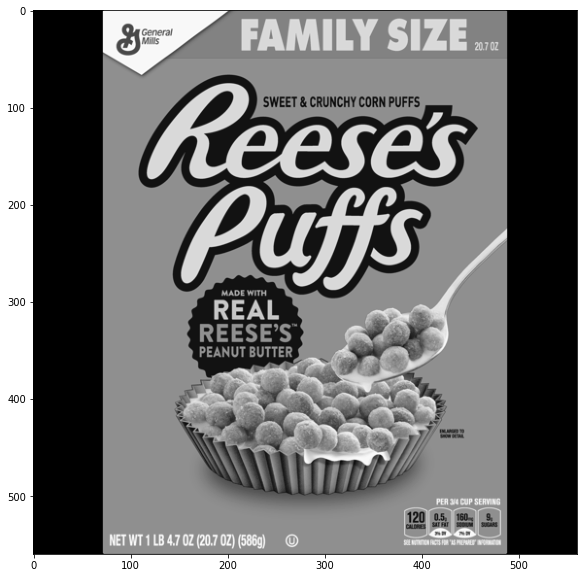

In [4]:
reeses=cv2.imread('/content/drive/MyDrive/PCVK/week_12/reeses_puffs.png',0)
display(reeses)

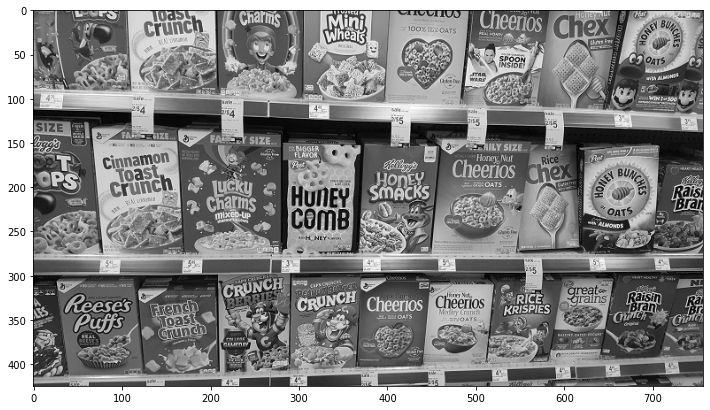

In [5]:
cereals=cv2.imread('/content/drive/MyDrive/PCVK/week_12/many_cereals.jpg', 0)
display(cereals)

In [6]:
orb = cv2.ORB_create()
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [7]:
len(matches)

139

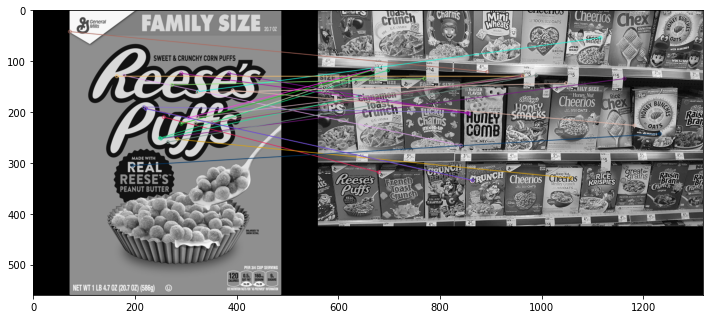

In [8]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [9]:
!pip install opencv-contrib-python==4.4.0.44

In [10]:
sift = cv2.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

# Makin kecil jarak makin cocok
# Ratio match1 < 75% Match2
for match1, match2 in matches:
  #jika jarak match 1 lebih kecil dari jarak 75% match2 descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [11]:
len(matches)

1501

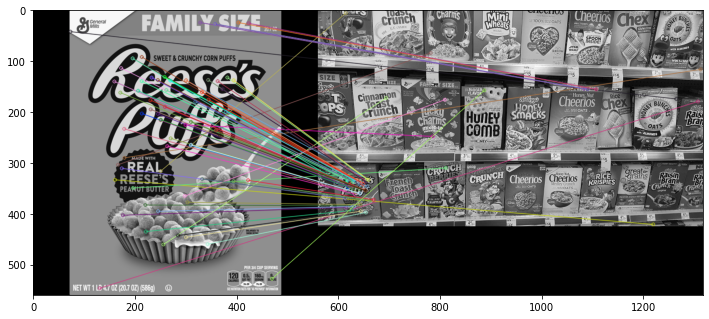

In [13]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)

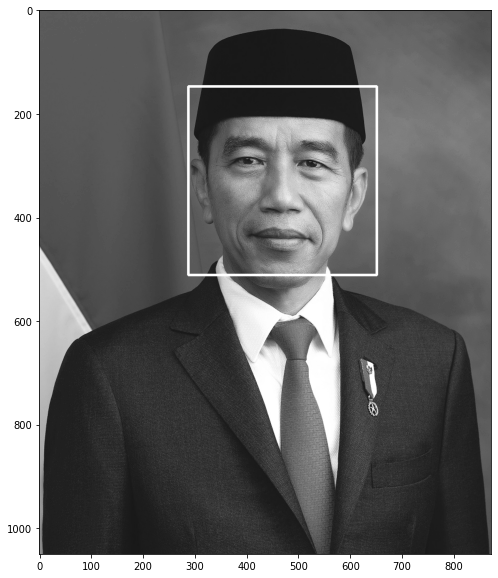

In [33]:
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/week_12/haarcascade_frontalface_alt2.xml')
jokowi = cv2.imread('/content/drive/MyDrive/PCVK/week_12/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
 cv2.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

**PRAKTIKUM**

Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
seperti biasa.

 Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). 

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa5890d7990>,
 <matplotlib.image.AxesImage at 0x7fa5890a4650>)

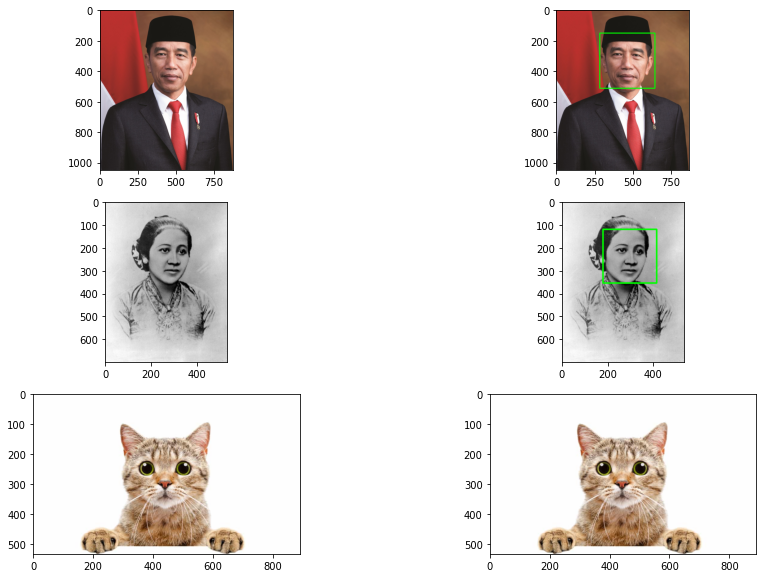

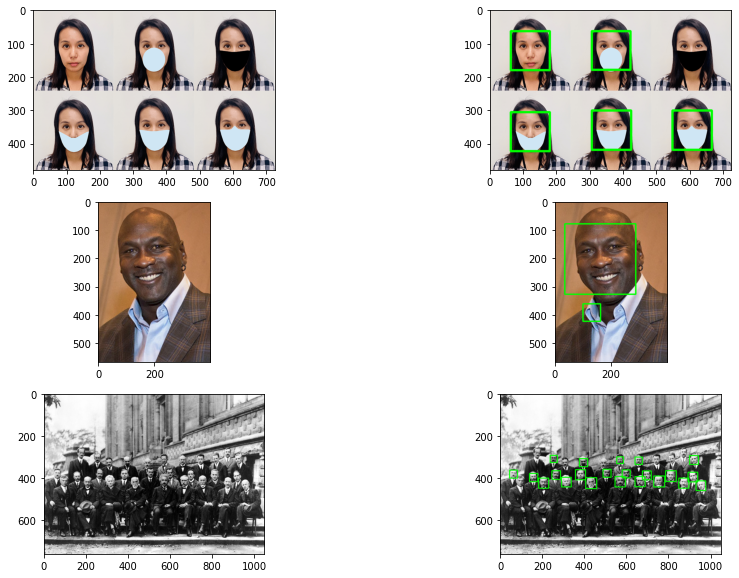

In [14]:
#Loading the image to be tested
jokowi_img_1 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/jokowi.jpg')
jokowi_img_2 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/jokowi.jpg')

kartini_img_1 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/kartini.jpg')
kartini_img_2 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/kartini.jpg')

kucing_img_1 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/kucing.jpg')
kucing_img_2 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/kucing.jpg')

mask_img_1 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/mask.png')
mask_img_2 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/mask.png')

mjordan_img_1 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/mjordan.jpg')
mjordan_img_2 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/mjordan.jpg')

solvayconf_img_1 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/solvayconf.jpg')
solvayconf_img_2 = cv2.imread('/content/drive/MyDrive/PCVK/week_12/solvayconf.jpg')

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
def faceCascadeFunction(image, thickness):
  faces_rects = faceCascade.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5);
  for (x,y,w,h) in faces_rects:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), thickness)    

# Gambar Jokowi
faceCascadeFunction(jokowi_img_2, 5)
# Gambar Kartini
faceCascadeFunction(kartini_img_2, 5)
# Gambar Kucing
faceCascadeFunction(kucing_img_2, 5)
# Gambar Mask
faceCascadeFunction(mask_img_2, 5)
# Gambar Mjordan
faceCascadeFunction(mjordan_img_2, 3)
# Gambar Solvayconf
faceCascadeFunction(solvayconf_img_2, 3)

f, axarr = plt. subplots(6,2,figsize=(15,10))
plt.subplot(321),plt.imshow(convertToRGB(jokowi_img_1))
plt.subplot(322),plt.imshow(convertToRGB(jokowi_img_2))

plt.subplot(323),plt.imshow(convertToRGB(kartini_img_1))
plt.subplot(324),plt.imshow(convertToRGB(kartini_img_2))

plt.subplot(325),plt.imshow(convertToRGB(kucing_img_1))
plt.subplot(326),plt.imshow(convertToRGB(kucing_img_2))

f, axarr = plt. subplots(6,2,figsize=(15,10))
plt.subplot(321),plt.imshow(convertToRGB(mask_img_1))
plt.subplot(322),plt.imshow(convertToRGB(mask_img_2))

plt.subplot(323),plt.imshow(convertToRGB(mjordan_img_1))
plt.subplot(324),plt.imshow(convertToRGB(mjordan_img_2))

plt.subplot(325),plt.imshow(convertToRGB(solvayconf_img_1))
plt.subplot(326),plt.imshow(convertToRGB(solvayconf_img_2))

<Figure size 720x720 with 0 Axes>

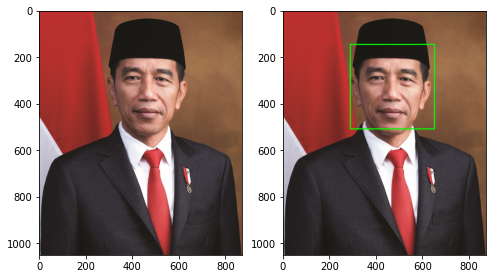

<Figure size 720x720 with 0 Axes>

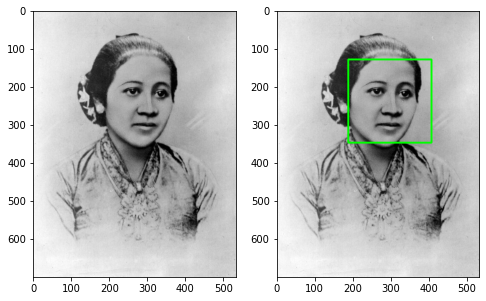

<Figure size 720x720 with 0 Axes>

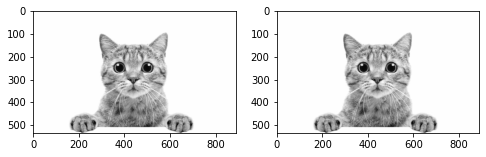

<Figure size 720x720 with 0 Axes>

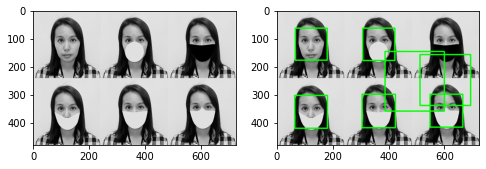

<Figure size 720x720 with 0 Axes>

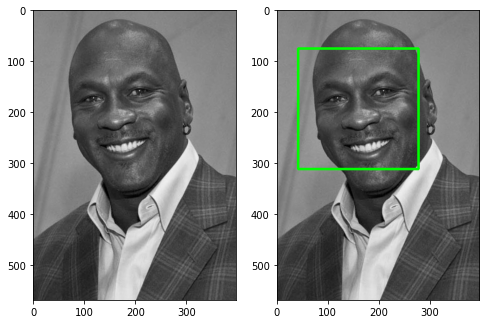

<Figure size 720x720 with 0 Axes>

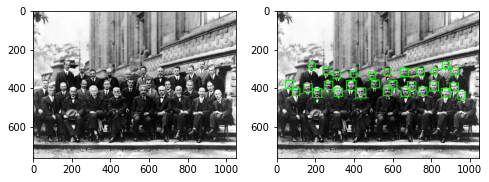

In [15]:
jokowi = cv2.imread('/content/drive/MyDrive/PCVK/week_12/jokowi.jpg')
jokowi_rgb = convertToRGB(jokowi)
jokowi_fd = jokowi_rgb.copy()

kartini = cv2.imread('/content/drive/MyDrive/PCVK/week_12/kartini.jpg',0)
kartini_rgb = convertToRGB(kartini)
kartini_fd = kartini_rgb.copy()

kucing = cv2.imread('/content/drive/MyDrive/PCVK/week_12/kucing.jpg',0)
kucing_rgb = convertToRGB(kucing)
kucing_fd = kucing_rgb.copy()

mask = cv2.imread('/content/drive/MyDrive/PCVK/week_12/mask.png',0)
mask_rgb = convertToRGB(mask)
mask_fd = mask_rgb.copy()

mjordan = cv2.imread('/content/drive/MyDrive/PCVK/week_12/mjordan.jpg',0)
mjordan_rgb = convertToRGB(mjordan)
mjordan_fd = mjordan_rgb.copy()

solvayconf = cv2.imread('/content/drive/MyDrive/PCVK/week_12/solvayconf.jpg',0)
solvayconf_rgb = convertToRGB(solvayconf)
solvayconf_fd = solvayconf_rgb.copy()

cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/week_12/haarcascade_frontalface_alt2.xml')
def newFaceCascadeFunction(image_rgb, image):
  fd_image = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in fd_image:
    cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0), 3)
  plt.figure(figsize = (10,10))
  f, axarr = plt. subplots(1,2,figsize=(8,8))
  plt.subplot(121),plt.imshow(image_rgb)
  plt.subplot(122),plt.imshow(image)
  plt.show()

# Gambar Jokowi
newFaceCascadeFunction(jokowi_rgb, jokowi_fd)
# Gambar Kartini
newFaceCascadeFunction(kartini_rgb, kartini_fd)
# Gambar Kucing
newFaceCascadeFunction(kucing_rgb, kucing_fd)
# Gambar Mask
newFaceCascadeFunction(mask_rgb, mask_fd)
# Gambar Mjordan
newFaceCascadeFunction(mjordan_rgb, mjordan_fd)
# Gambar Solvayconf
newFaceCascadeFunction(solvayconf_rgb, solvayconf_fd)

Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

<Figure size 720x720 with 0 Axes>

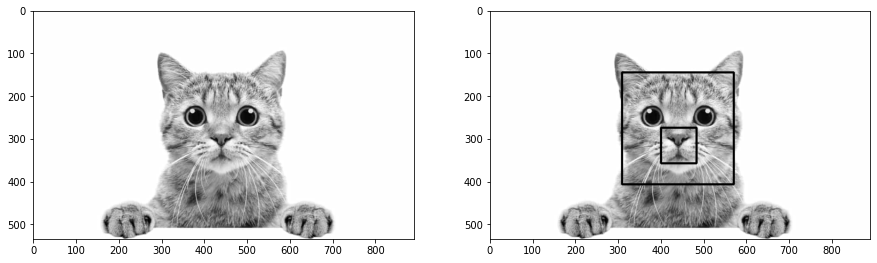

In [16]:
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalcatface.xml")

kucing = cv2.imread('/content/drive/MyDrive/PCVK/week_12/kucing.jpg', 0)
kucing_ori = cv2.imread('/content/drive/MyDrive/PCVK/week_12/kucing.jpg', 0)

roi_wajah = cascade_wajah.detectMultiScale(kucing_ori)
for (x,y,w,h) in roi_wajah: 
  cv2.rectangle(kucing_ori,(x,y),(x+w,y+h),(0,255,0),3) 
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kucing, cmap='gray')
plt.subplot(122),plt.imshow(kucing_ori, cmap='gray')
plt.show()

Cobakan juga untuk eyes detection.

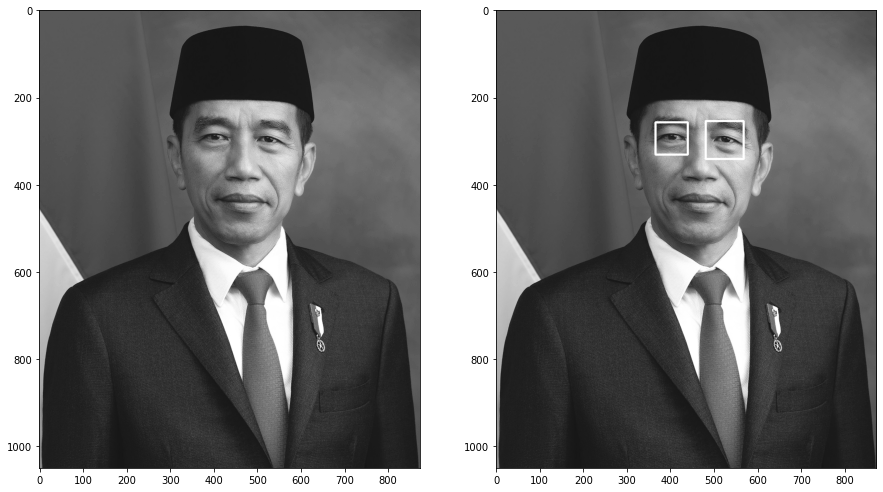

In [17]:
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

jokowi = cv2.imread('/content/drive/MyDrive/PCVK/week_12/jokowi.jpg')
jokowi_ori = cv2.imread('/content/drive/MyDrive/PCVK/week_12/jokowi.jpg')
jokowi_gray = cv2.cvtColor(jokowi, cv2.COLOR_BGR2GRAY)
jokowi_ori_gray = cv2.cvtColor(jokowi_ori, cv2.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_gray)
for (x,y,w,h) in roi_wajah: 
  cv2.rectangle(jokowi_gray,(x,y),(x+w,y+h),(255,255,255),3)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121),plt.imshow(jokowi_ori_gray, cmap='gray')
plt.subplot(122),plt.imshow(jokowi_gray, cmap='gray')
plt.show()

Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [18]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64decode(iobuf.getvalue()), 'utf-8')))
  
  return bbox_to_bytes

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [19]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)

  cv2.imwrite(filename, img)

  return filename

Image data of dtype object cannot be converted to float


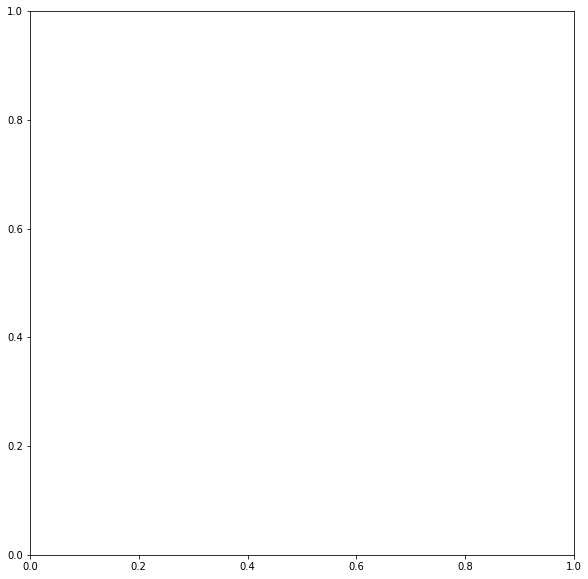

In [34]:
try:
  filename = take_photo('photo1.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

In [26]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [30]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

TypeError: ignored

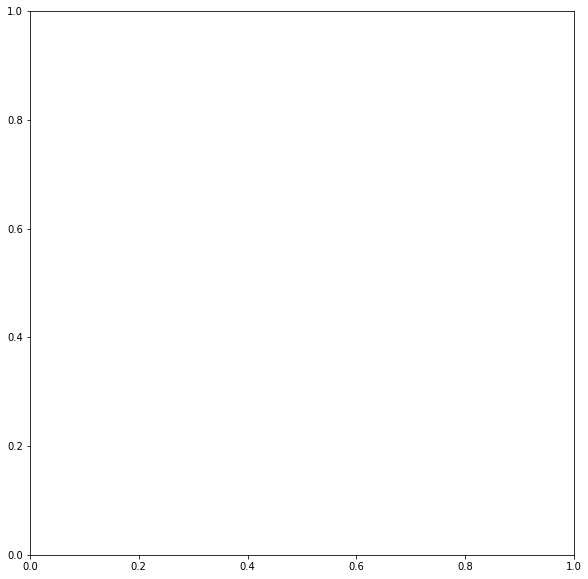

In [31]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

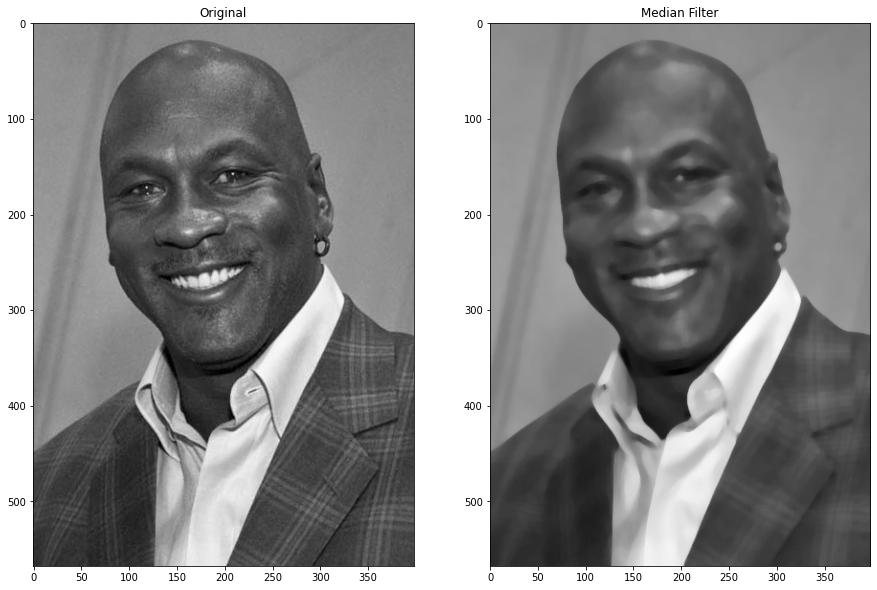

In [32]:
image = cv2.imread('/content/drive/MyDrive/PCVK/week_12/mjordan.jpg') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to GRAY
figure_size = 9 # the dimension of the x and y axis of the kernal.

new_image = cv2.medianBlur(image, figure_size)
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.show()